For each borough, during which hours are accidents most likely to occur?  

What are the top 5 causes of accidents in the city?  For each borough, during which hours are accidents most likely to occur?  

What are the top 5 causes of accidents in the city?  

In [5]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from unidecode import unidecode


# Instruct jupyter to plot in the notebook
%matplotlib inline

In [6]:
df = pd.read_csv('../../../samples/processed/preprocessed_accidents.csv')

In [7]:
df.fecha=pd.to_datetime(df.fecha)
df.fecha.sort_values(ascending=True).head()
df['mensual']=df.fecha.dt.to_period('M')


In [8]:
df.columns

Index(['timestamp', 'cbml', 'expediente', 'tipo_geocode', 'direccion_enc',
       'clase', 'x_long_y_lat', 'mes', 'periodo', 'comuna', 'incidente',
       'direccion', 'operador', 'path', 'num_comuna', 'diseno', 'barrio',
       'gravedad', 'fecha', 'y_magnamed', 'x_magnet', 'version', 'id',
       'radicado', 'fecha_incidente', 'hora_incidente', 'mensual'],
      dtype='object')

In [9]:
df.clase.unique()


array(['Atropello', 'Choque', 'Otro', 'Caida Ocupante', 'Volcamiento',
       'Caída de Ocupante', 'Incendio', nan, 'Caída Ocupante', 'Choque ',
       'Caida de Ocupante'], dtype=object)

In [25]:
df.fillna('Desconocido',inplace=True)
df.clase = df.clase.apply(lambda x: unidecode(x).upper().strip().replace(' de ',' '))

In [43]:
df.clase.unique()

array(['ATROPELLO', 'CHOQUE', 'OTRO', 'CAIDA OCUPANTE', 'VOLCAMIENTO',
       'INCENDIO', 'DESCONOCIDO'], dtype=object)

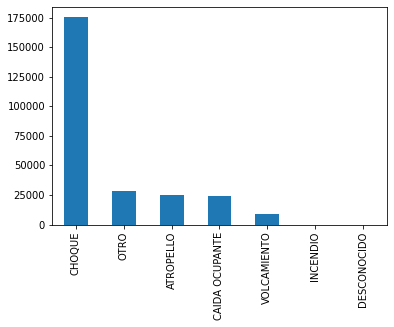

In [47]:
df.clase.value_counts().plot.bar()

In [41]:

top_clase = df[['clase','fecha']].groupby('clase').count().copy()
top_clase.rename(columns={'fecha':'casos'},inplace=True)
top_clase.sort_values(by='casos',ascending=False).reset_index()

,clase,casos
0,CHOQUE,175075
1,OTRO,28722
2,ATROPELLO,25209
3,CAIDA OCUPANTE,23942
4,VOLCAMIENTO,8885
5,INCENDIO,36
6,DESCONOCIDO,6



|                |   clase |
|:---------------|--------:|
| choque         |  175075 |
| otro           |   28722 |
| atropello      |   25209 |
| caida ocupante |   23942 |
| volcamiento    |    8885 |
| incendio       |      36 |
| desconocido    |       6 |

In [72]:

top_gravedad = df[['gravedad','fecha']].groupby('gravedad').count().copy()
top_gravedad.rename(columns={'fecha':'casos'},inplace=True)
top_gravedad.sort_values(by='casos',ascending=False).reset_index()

,gravedad,casos
0,Con heridos,144057
1,Solo daños,116380
2,Con muertos,1438


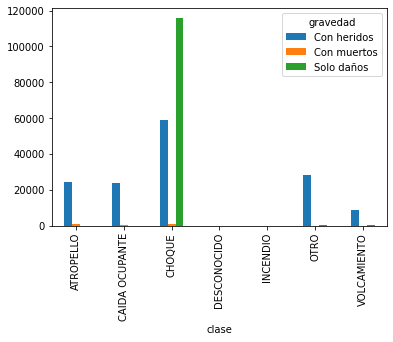

In [74]:
pd.crosstab(df.clase,df.gravedad).plot.bar()

In [75]:
pd.crosstab(df.clase,df.gravedad)

gravedad,Con heridos,Con muertos,Solo daños
clase,,,
ATROPELLO,24512,697,0
CAIDA OCUPANTE,23871,71,0
CHOQUE,58789,655,115631
DESCONOCIDO,3,0,3
INCENDIO,15,0,21
OTRO,28266,10,446
VOLCAMIENTO,8601,5,279
